<a href="https://colab.research.google.com/github/ikoghoemmanuell/Azubi-Store-Sales-Review-/blob/main/gossipop_EDA_%26_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection Using Machine Learning and Deep Learning Models

This notebook aims to classify fake news from real news.

In [35]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Machine Learning
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer # Import for transforming text into numerical features using TF-IDF
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Deep Learning
import tensorflow as tf  # Import TensorFlow library for deep learning tasks
import keras  # Import Keras library for building neural networks
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Import for padding sequences
from keras.models import Model, Sequential  # Import for defining neural network models
from keras.layers import Input, Dense, Activation, Bidirectional, LSTM, Dropout, Embedding  # Import for different layers in neural networks
from keras.preprocessing.text import Tokenizer  # Import for tokenizing text
from keras.preprocessing import sequence  # Import for processing sequences
from keras.callbacks import EarlyStopping  # Import for early stopping during model training

# Configuring TensorFlow logging
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  # Set TensorFlow logging verbosity to error level

# Text processing
from wordcloud import WordCloud  # Import for generating word clouds

# Mounting Google Drive
from google.colab import drive  # Import for accessing Google Drive

# Unzipping files
import zipfile  # Import for extracting zip files


Read the data

In [2]:
real_url = "https://raw.githubusercontent.com/KaiDMML/FakeNewsNet/master/dataset/gossipcop_real.csv"
fake_url = "https://raw.githubusercontent.com/KaiDMML/FakeNewsNet/master/dataset/gossipcop_fake.csv"

# Read the csv file from the url
fake = pd.read_csv(fake_url)
real = pd.read_csv(real_url)

# A way to delete rows with empty or null values
fake = fake[~fake.isna().any(axis=1)]
real = real[~real.isna().any(axis=1)]

In [3]:
fake["label"] = 1
real["label"] = 0

<ipython-input-3-89cb7829fca8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake["label"] = 1


In [4]:
df = pd.concat([fake, real], axis =0 )
df.head(10)

,id,news_url,title,tweet_ids,label
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,1
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,1
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,1
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,1
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,1
5,gossipcop-5189580095,www.townandcountrymag.com/society/tradition/a1...,Here's What Really Happened When JFK Jr. Met P...,890253005299351552\t890401381814870016\t890491...,1
6,gossipcop-9588339534,www.foxnews.com/entertainment/2016/12/16/bigge...,Biggest celebrity scandals of 2016,683226380742557696\t748604615503929345\t748604...,1
7,gossipcop-8753274298,www.eonline.com/news/958257/caitlyn-jenner-add...,Caitlyn Jenner Addresses Rumored Romance With ...,1026891446081728512\t1026891745219543043\t1026...,1
8,gossipcop-8105333868,www.inquisitr.com/3871816/taylor-swift-reporte...,Taylor Swift Reportedly Reacts To Tom Hiddlest...,818928533569437697\t819100640878202880\t819174...,1
9,gossipcop-2803748870,www.huffingtonpost.com/entry/kate-mckinnon-the...,"For The Love Of God, Why Can't Anyone Write Ka...",816030248190046212\t816030859484626947\t816049...,1


Checking for null values

## EDA

In [5]:
df.head()

,id,news_url,title,tweet_ids,label
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,1
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,1
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,1
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,1
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20645 entries, 0 to 16815
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         20645 non-null  object
 1   news_url   20645 non-null  object
 2   title      20645 non-null  object
 3   tweet_ids  20645 non-null  object
 4   label      20645 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 967.7+ KB


Check out the distribution of fake news compare to real news

([<matplotlib.patches.Wedge at 0x7fd8ef735810>,
 [Text(-0.8138650525648107, 0.8818297319855336, 'Fake'),
  Text(0.8138650938462391, -0.8818296938857598, 'True')],
 [Text(-0.4747546139961395, 0.5144006769915612, '23.7%'),
  Text(0.4747546380769727, -0.5144006547666932, '76.3%')])

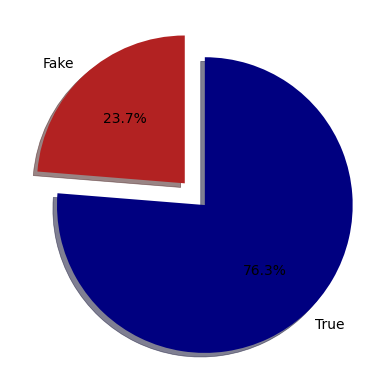

In [7]:
# Checking if our df is well balanced
label_size = [df['label'].sum(),len(df['label'])-df['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

target column is imbalanced, so we resample it

In [8]:
# Get the majority class
majority_class = df[df["label"] == 0]

# resample the majority class (0 which is real)
majority_resampled = resample(majority_class,
                             replace=True,
                             n_samples=df["label"].value_counts()[1],
                             random_state=123)

# Combine the resampled majority class with the majority class
df_resampled = pd.concat([df[df["label"] == 1], majority_resampled])

([<matplotlib.patches.Wedge at 0x7fd8ef5df7f0>,
 [Text(-1.2000000000000002, 1.469576158976824e-16, 'Fake'),
  Text(1.2000000000000002, -2.939152317953648e-16, 'True')],
 [Text(-0.7, 8.572527594031472e-17, '50.0%'),
  Text(0.7, -1.7145055188062944e-16, '50.0%')])

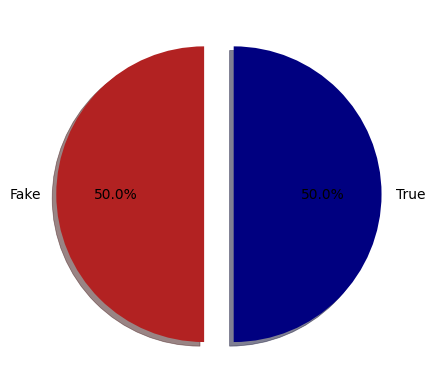

In [9]:
# Checking if our df_resampled is well balanced
label_size = [df_resampled['label'].sum(),len(df_resampled['label'])-df_resampled['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

word cloud for title column

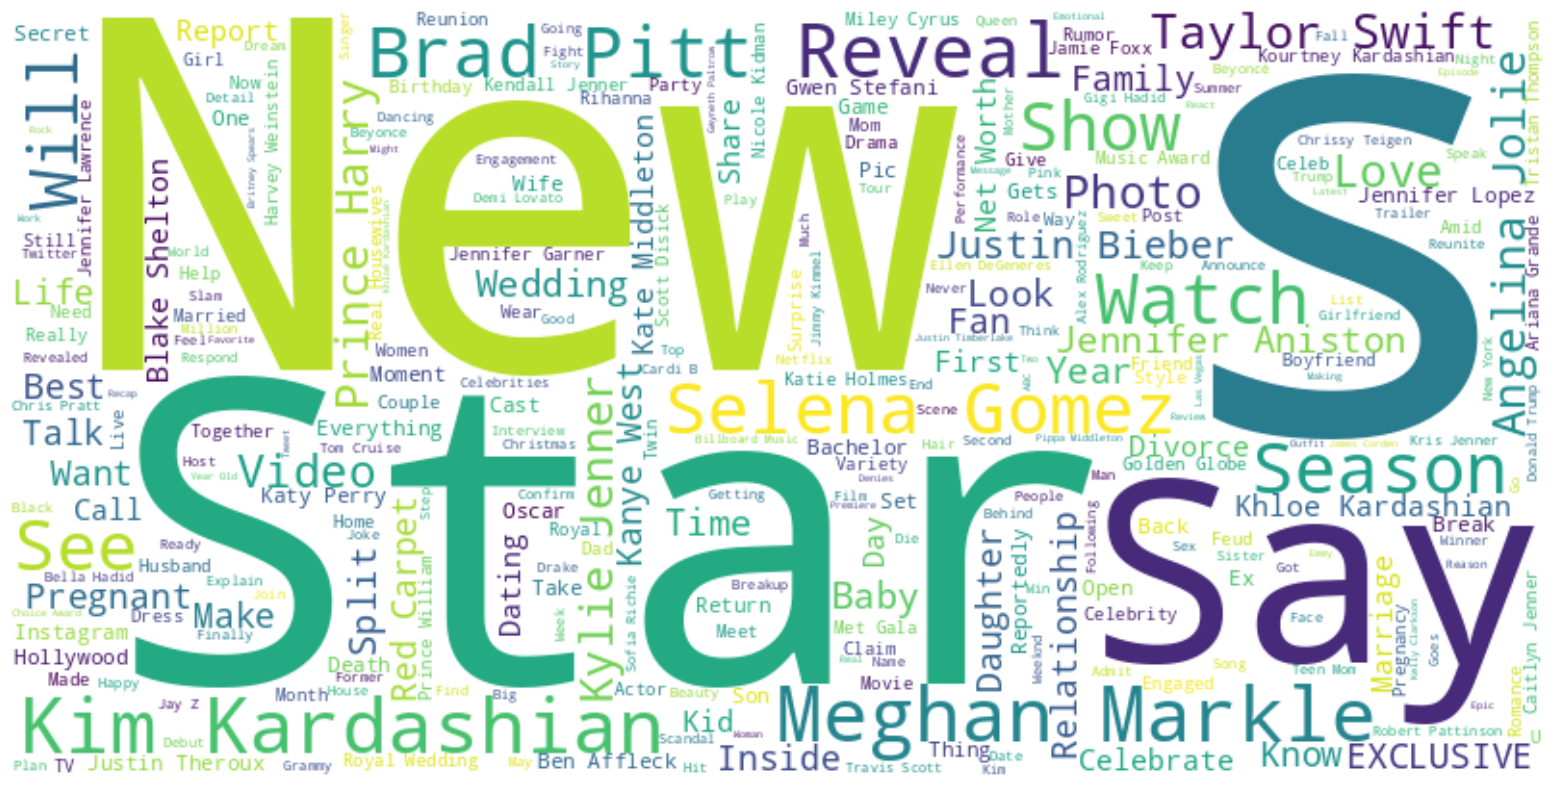

In [10]:
# Concatenate all the titles from the 'title' column in the DataFrame into a single string
titles = ' '.join(title for title in df['title'])

# Create a WordCloud object with specified configurations
wordcloud = WordCloud(
    background_color='white',  # Set the background color of the word cloud to white
    max_words=300,  # Set the maximum number of words to be displayed in the word cloud
    width=800,  # Set the width of the word cloud figure
    height=400  # Set the height of the word cloud figure
).generate(titles)  # Generate the word cloud based on the concatenated titles

# Display the word cloud figure
plt.figure(figsize=(20, 10))  # Set the size of the figure to display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud with bilinear interpolation
plt.axis("off")  # Turn off the axis labels and ticks
plt.show()  # Show the word cloud figure

the news titles are about entertainment mostly

Split into training and testing

In [11]:
features = df_resampled['title']
targets = df_resampled['label']

X_train, X_test, y_train, y_test = train_test_split(
  features,
  targets,
  test_size=0.20,
  random_state=18
  )

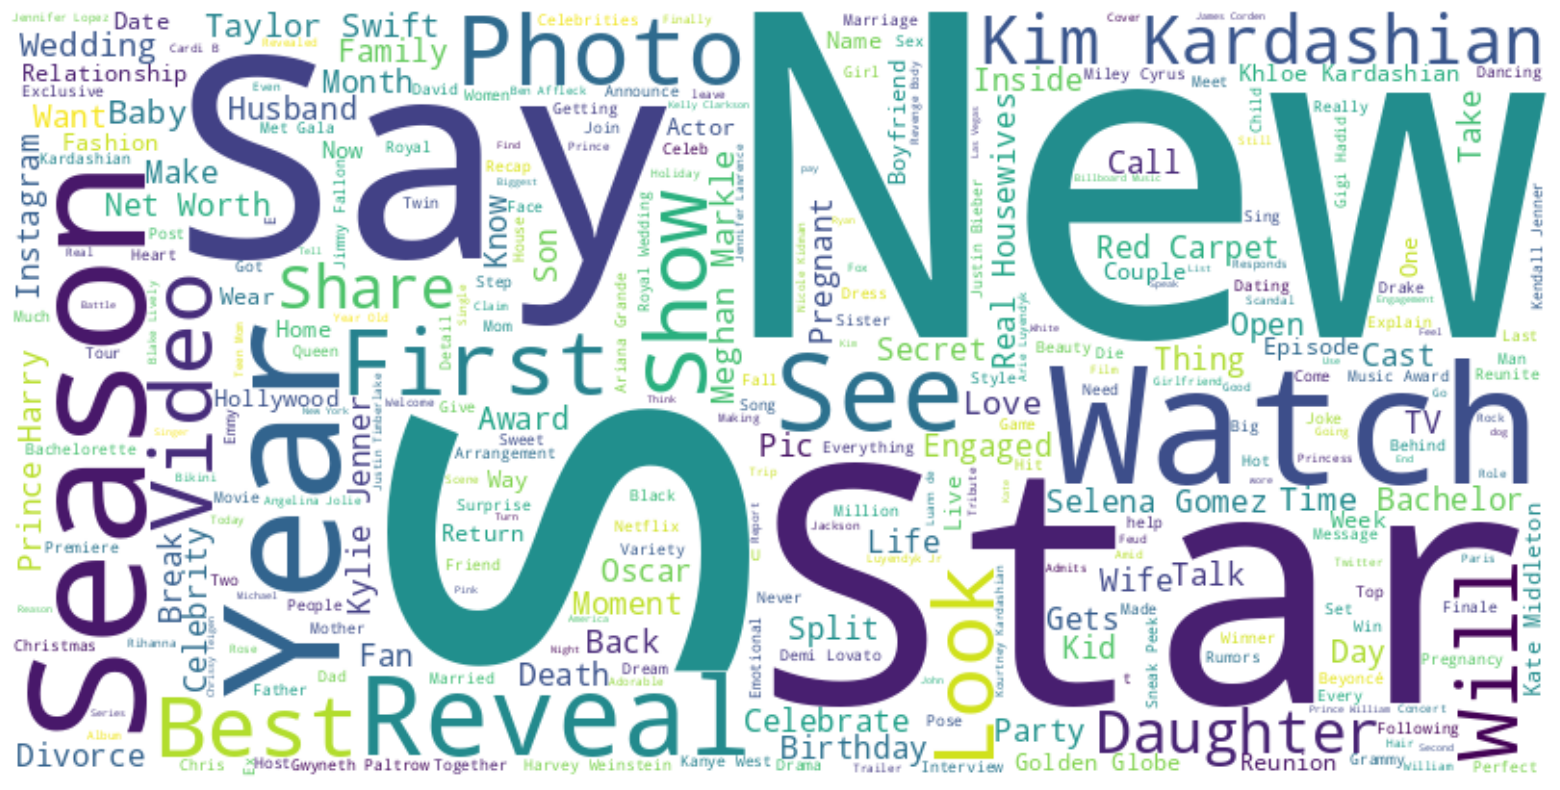

In [12]:
fake_news = X_train[y_train == 0]
real_news = X_train[y_train == 1]
fake_texts = ' '.join(text for text in fake_news)
wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    width=800,
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

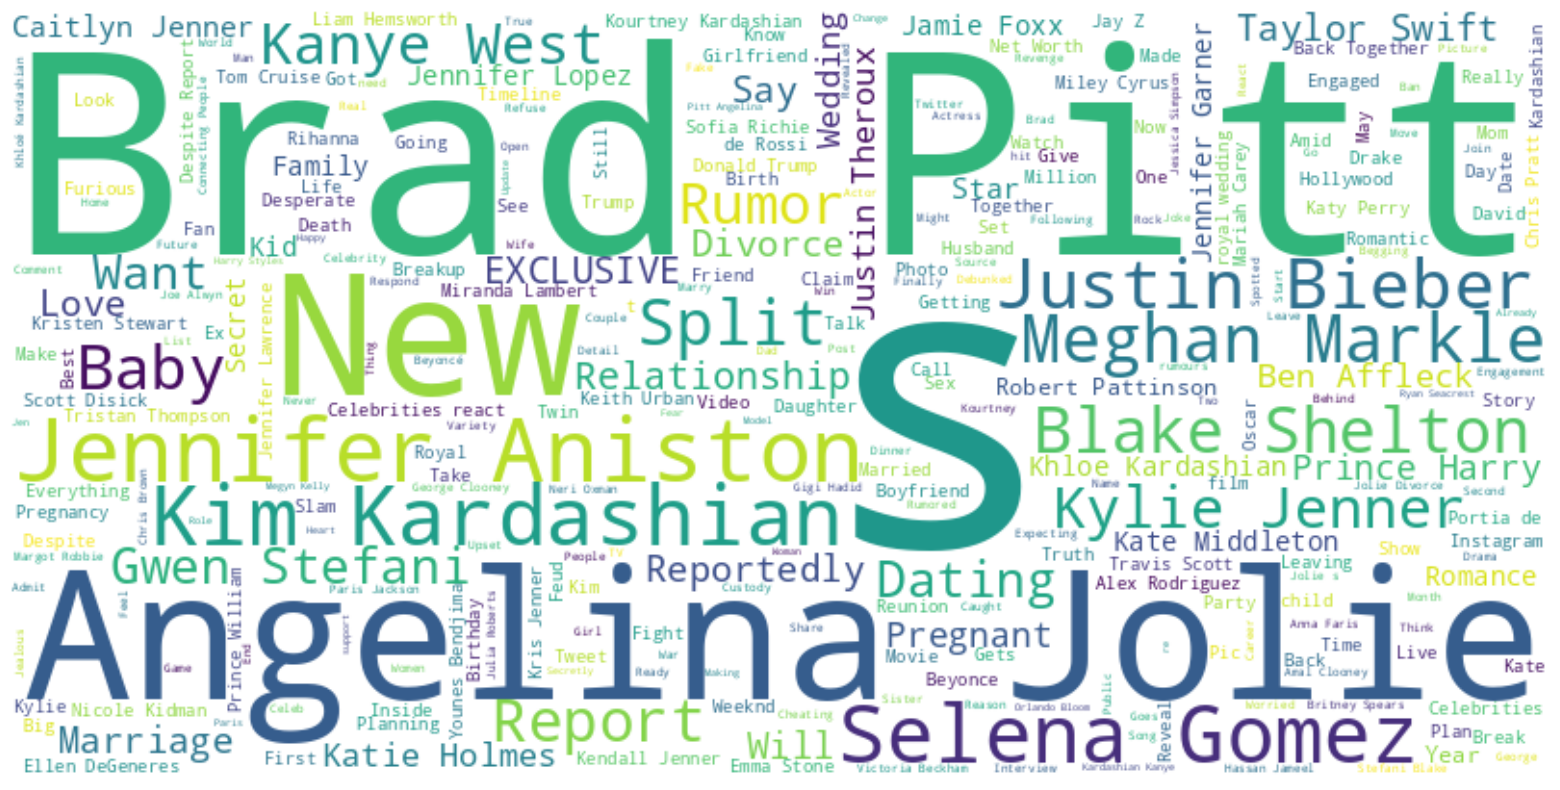

In [13]:
fake_news = X_train[y_train == 0]
real_news = X_train[y_train == 1]
fake_texts = ' '.join(text for text in real_news)
wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    width=800,
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Real news mentions names more frequently

# Machine Learning

### RNN

Normalizing our data: lower case, get rid of extra spaces, and url links.

In [14]:
# Function to replace usernames and links with placeholders.
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Normalize the text data in X_train and X_test using the preprocess() function
X_train = [preprocess(text) for text in X_train]
X_test = [preprocess(text) for text in X_test]

In [15]:
# define tokenizer and fit it
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

Convert text to vectors, our classifier only takes numerical data.

In [16]:
# tokenize the text into vectors
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

Apply padding so we have the same length for each article

In [17]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

Building the RNN.

In [18]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 128),  # Embedding layer for word representation
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),  # Bidirectional LSTM layer with 64 units, returns sequences
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),  # Bidirectional LSTM layer with 16 units
    tf.keras.layers.Dense(64, activation='relu'),  # Fully connected dense layer with 64 units and ReLU activation
    tf.keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(1)  # Output layer with 1 unit (binary classification)
])

# Print the summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

We are going to use early stop, which stops when the validation loss no longer improve.

In [19]:
early_stop = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss',
  patience=2,
  restore_best_weights=True
  )

model.compile(
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy']
              )

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/10
236/236 [==============================] - 45s 107ms/step - loss: 0.6905 - accuracy: 0.5014 - val_loss: 0.6800 - val_accuracy: 0.4847
Epoch 2/10
236/236 [==============================] - 9s 40ms/step - loss: 0.5555 - accuracy: 0.6729 - val_loss: 0.4735 - val_accuracy: 0.7755
Epoch 3/10
236/236 [==============================] - 9s 39ms/step - loss: 0.3871 - accuracy: 0.8500 - val_loss: 0.4809 - val_accuracy: 0.7857
Epoch 4/10
236/236 [==============================] - 8s 34ms/step - loss: 0.3203 - accuracy: 0.8776 - val_loss: 0.4874 - val_accuracy: 0.7832


Evaluate the testing set

In [20]:
model.evaluate(X_test, y_test)

62/62 [==============================] - 1s 20ms/step - loss: 0.4704 - accuracy: 0.7806


[0.4703929126262665, 0.7806122303009033]

In [22]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

62/62 [==============================] - 4s 27ms/step


In [23]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('F1 score on testing set:', f1_score(binary_predictions, y_test))

Accuracy on testing set: 0.7806122448979592
F1 score on testing set: 0.7584269662921349


# Deep Learning

### LSTM

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify = targets, random_state = 10)

In [25]:
#define Keras Tokenizer
tok = Tokenizer()
tok.fit_on_texts(X_train)

# tokenize data
sequences = tok.texts_to_sequences(X_train)
#return sequences
test_sequences = tok.texts_to_sequences(X_test)

#print size of the vocabulary
print(f'Train vocabulary size: {len(tok.word_index)}')

Train vocabulary size: 12329


In [29]:
#maximum sequence length (512 to prevent memory issues and speed up computation)
MAX_LEN = 512

#padded sequences
X_train_seq = pad_sequences(sequences,maxlen=MAX_LEN)
X_test_seq = pad_sequences(test_sequences,maxlen=MAX_LEN)

In [30]:
# Define the model architecture
model = tf.keras.Sequential([
    Input(name='inputs', shape=[MAX_LEN]),  # Define input layer with specified shape
    Embedding(len(tok.word_index), 128),  # Add an embedding layer with a specified vocabulary size and embedding dimension
    Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),  # Add a bidirectional LSTM layer with 128 units and return sequences
    Bidirectional(tf.keras.layers.LSTM(64)),  # Add another bidirectional LSTM layer with 64 units
    Dense(64, activation='relu'),  # Add a dense layer with 64 units and ReLU activation function
    Dropout(0.5),  # Add a dropout layer with a dropout rate of 0.5 to prevent overfitting
    Dense(1, activation='sigmoid')  # Add a dense layer with 1 unit and sigmoid activation for binary classification
])

# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),  # Use binary cross-entropy as the loss function
    optimizer=tf.keras.optimizers.Adam(1e-4),  # Use Adam optimizer with a learning rate of 1e-4
    metrics=['accuracy']  # Track accuracy as a metric during training
)

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 512, 128)          1578112   
                                                                 
 bidirectional_2 (Bidirectio  (None, 512, 256)         263168    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

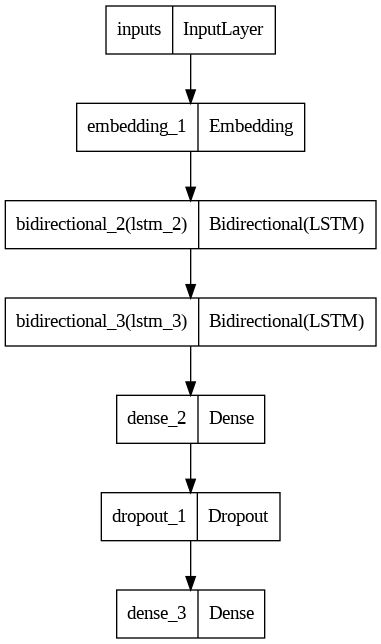

In [31]:
#plot the model architecture
tf.keras.utils.plot_model(model)

In [32]:
history = model.fit(
  X_train_seq,
  y_train,
  epochs=10,
  validation_split = 0.2,
  batch_size = 64,
  callbacks=[EarlyStopping(
    monitor='val_accuracy',
    mode='max', patience=3,
    verbose=False,
    restore_best_weights=True
    )])

Epoch 1/10
92/92 [==============================] - 30s 245ms/step - loss: 0.6926 - accuracy: 0.5224 - val_loss: 0.6906 - val_accuracy: 0.6340
Epoch 2/10
92/92 [==============================] - 11s 125ms/step - loss: 0.6649 - accuracy: 0.6641 - val_loss: 0.5759 - val_accuracy: 0.6966
Epoch 3/10
92/92 [==============================] - 11s 124ms/step - loss: 0.4731 - accuracy: 0.7865 - val_loss: 0.5058 - val_accuracy: 0.7497
Epoch 4/10
92/92 [==============================] - 10s 112ms/step - loss: 0.3373 - accuracy: 0.8678 - val_loss: 0.4517 - val_accuracy: 0.8122
Epoch 5/10
92/92 [==============================] - 9s 102ms/step - loss: 0.2426 - accuracy: 0.9132 - val_loss: 0.4564 - val_accuracy: 0.8088
Epoch 6/10
92/92 [==============================] - 10s 110ms/step - loss: 0.1812 - accuracy: 0.9444 - val_loss: 0.5538 - val_accuracy: 0.7986
Epoch 7/10
92/92 [==============================] - 11s 121ms/step - loss: 0.1345 - accuracy: 0.9605 - val_loss: 0.6056 - val_accuracy: 0.7864


In [33]:
test_loss, test_acc = model.evaluate(X_test_seq, y_test)
y_hat = model.predict(X_test_seq)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

77/77 [==============================] - 3s 24ms/step
Test Loss: 0.4991994798183441
Test Accuracy: 0.790118396282196


In [36]:
## print classification report
print(classification_report(y_test, np.where(y_hat >= 0.5, 1, 0)))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1224
           1       0.79      0.79      0.79      1225

    accuracy                           0.79      2449
   macro avg       0.79      0.79      0.79      2449
weighted avg       0.79      0.79      0.79      2449



## Logistic Regression

In [37]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

In [38]:
lr = LogisticRegression()
lr.fit(xv_train,y_train)

LogisticRegression()

In [39]:
pred_lr=lr.predict(xv_test)

In [40]:
lr.score(xv_test, y_test)

0.7958350347080441

In [41]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1224
           1       0.82      0.76      0.79      1225

    accuracy                           0.80      2449
   macro avg       0.80      0.80      0.80      2449
weighted avg       0.80      0.80      0.80      2449



## Random Forest Classifier

In [42]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [43]:
rfc.score(xv_test, y_test)

0.7807268272764394

In [44]:
pred_rfc = rfc.predict(xv_test)

In [45]:
pred_rfc = rfc.predict(xv_test)
rfc.score(xv_test, y_test)

0.7807268272764394

In [46]:
rfc.score(xv_test, y_test)

0.7807268272764394

In [47]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1224
           1       0.80      0.76      0.78      1225

    accuracy                           0.78      2449
   macro avg       0.78      0.78      0.78      2449
weighted avg       0.78      0.78      0.78      2449

